# Homework 2: Ridge Regression and Gradient Descent

Student Name: Kuan-Lin Liu

Net ID: kll482

## Computing Risk

### 1. (a)

$E(||\overrightarrow{X}||^2_2)$

$=E(\sum_{i=1}^{n} X^2_i)$

$=\sum_{i=1}^{n} E(X^2_i)$

$=nE(X^2_1)$

$=n*\frac{1}{5}*[(-2)^2+(1)^2+(0)^2+(1)^2+(2)^2]$

$=2n$

### 1. (b)

$E(||\overrightarrow{X}_\infty||)$

$=E(max|X_i|)$

$=Pr(|X_i|=2)*2+Pr(|X_i|=1)\cdot1$

$=(1-(\frac{3}{5})^n)\cdot2+((\frac{3}{5})^n-(\frac{1}{5})^n)\cdot1$


### 1. (c)

$Var(X)=E(X^2)-E(X)^2=\frac{1}{5}((-2)^2+(1)^2+(0)^2+(1)^2+(2)^2)-0=2$

$\sum=\begin{bmatrix}
 2& 0 & 0 & \cdots & 0\\ 
 0& 2 & 0 & \cdots & 0\\ 
 0& 0 & 2 & \cdots & 0\\ 
 \vdots & \vdots & \vdots & \ddots & \vdots\\ 
 0& 0 & 0 & \cdots & 2
\end{bmatrix}_{n\times n}$

### 2. (a)

$R(a)=E(a-y)^2$

$=E_y(a^2-2ay+y^2)$

$=E(a^2)-2E(ay)+E(y^2)$

$=a^2-2aE(y)+Var(y)+E(y)^2$

$=(a-E(y))^2+Var(y)$


To get minimal risk:

$\frac{\partial E\cal L(a, y)}{\partial a}=0$

$=> 2(a-E(y))=0$

$\therefore a=E(y)$

To get the risk of a^*:

$R(a^*)=E(a^*-y)^2$

$=(a^*-E(y))^2+Var(y)$

$\because a^*=E(y)$

$\therefore R(a^*)=(E(y)-E(y))^2+Var(y)=Var(y)$

### 2. (b)

#### i.

Let $a = f(x)$

$f^*(x)=\mathop{\arg\min}_{f(x)} E[(f(x)-y)^2|x]$

$=E[f(x)^2-2f(x)y+y^2|x]$

$=f(x)^2-2f(x)E(y|x)+E(y^2|x)$

To get minimum:

$\frac{\partial E[(f(x)-y)^2|x]}{\partial f(x)}=2f(x)-2E(y|x)=0$

$\therefore f^*(x)=E(y|x)$

#### ii.

Continuing from 2.a, we know

$RHS=EE[(f(x)-y)^2|x]$

$=E[Var(y|x]+(f(x)-E(y|x))^2]$

$\geq E(Var(y|x))$



$LHS=EE[(f^*(x)-y)^2|x]$

$=E[Var(y|x]+(f^*(x)-E(y|x))^2]$

$=E[Var(y|x)+(E(y|x)-E(y|x))^2]$

$=E(Var(y|x))$

$\therefore RHS \geq LHS$

By the law of iterated expectations, we also know

$EE[(f^*(x)-y)^2|x]=E[(f^*(x)-y)^2]$

$EE[(f(x)-y)^2|x]=E[(f(x)-y)^2]$

$\therefore E[(f^*(x)-y)^2] \leq E[(f(x)-y)^2]$ is True

## Linear Regression

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### 1. (a)

In [2]:
### Feature normalization
def feature_normalization(train, test):
    """Rescale the data so that each feature in the training set is in
    the interval [0,1], and apply the same transformations to the test
    set, using the statistics computed on the training set.

    Args:
        train - training set, a 2D numpy array of size (num_instances, num_features)
        test - test set, a 2D numpy array of size (num_instances, num_features)

    Returns:
        train_normalized - training set after normalization
        test_normalized - test set after normalization
    """
    # TODO
    col_max = np.apply_along_axis(max, 0, train)
    col_min = np.apply_along_axis(min, 0, train)

    train_normalized = (train-col_min)/(col_max-col_min)
    test_normalized = (test-col_min)/(col_max-col_min)
    
    return train_normalized, test_normalized

### 2. (a)

Given $X \in \mathcal{R}^{m\times(d+1)}$, $y=(y_1,...,y_m)^T \in \mathcal{R}^{m\times1}$, $\theta \in \mathcal{R}^{d+1}$

$J=\frac{1}{m} \sum_{i=1}^{m}(h_{\theta}(x_i)-y_i)^2=\frac{1}{m}(x\theta-y)^T(x\theta-y)$

### 2. (b)

According to (a), $J=\frac{1}{m}(x\theta-y)^T(x\theta-y)$


$J=\frac{1}{m}({\theta}^Tx^T-y^T)(x\theta-y)$

$=\frac{1}{m}[{\theta}^Tx^Tx\theta-{\theta}^Tx^Ty-y^Tx\theta+y^Ty$

$=\frac{1}{m}[{\theta}^Tx^Tx\theta-2(x\theta)^Ty+y^Ty]$

$=\frac{1}{m}[{\theta}^Tx^Tx\theta-2(x\theta)^Ty+y^Ty$

$\nabla J(\theta)=\frac{\partial J(\theta)}{\partial \theta}=\frac{2}{m}[x^Tx\theta-x^Ty]$

### 2. (c)

Considering the slop of $J(\theta)$

$J(\theta+\eta h) = J(\theta) + \nabla J(\theta) \cdot \eta h$

$\therefore J(\theta+\eta h)-J(\theta)=\nabla J(\theta) \cdot \eta h$

### 2. (d)

${\theta}^{k+1} = \theta^k-\eta \nabla J(\theta)$

### 2. (e)

In [3]:
### The square loss function
def compute_square_loss(X, y, theta):
    """
    Given a set of X, y, theta, compute the average square loss for predicting y with X*theta.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D array of size (num_features)

    Returns:
        loss - the average square loss, scalar
    """
    loss = 0 #Initialize the average square loss
    #TODO
    P = (np.dot(X, theta)-y)
    m = X.shape[0]

    loss = (1/m) * np.dot(P, P)
    return loss

### 2. (f)

In [4]:
### The gradient of the square loss function
def compute_square_loss_gradient(X, y, theta):
    """
    Compute the gradient of the average square loss (as defined in compute_square_loss), at the point theta.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)

    Returns:
        grad - gradient vector, 1D numpy array of size (num_features)
    """
    #TODO
    P = (np.dot(X, theta)-y)
    m = X.shape[0]

    return (2/m)*np.dot(X.T, P)

### 3. (a)

In [5]:
### Gradient checker
def grad_checker(X, y, theta, epsilon=0.01, tolerance=1e-4):
    """Implement Gradient Checker
    Check that the function compute_square_loss_gradient returns the
    correct gradient for the given X, y, and theta.

    Let d be the number of features. Here we numerically estimate the
    gradient by approximating the directional derivative in each of
    the d coordinate directions:
    (e_1 = (1,0,0,...,0), e_2 = (0,1,0,...,0), ..., e_d = (0,...,0,1))

    The approximation for the directional derivative of J at the point
    theta in the direction e_i is given by:
    ( J(theta + epsilon * e_i) - J(theta - epsilon * e_i) ) / (2*epsilon).

    We then look at the Euclidean distance between the gradient
    computed using this approximation and the gradient computed by
    compute_square_loss_gradient(X, y, theta).  If the Euclidean
    distance exceeds tolerance, we say the gradient is incorrect.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)
        epsilon - the epsilon used in approximation
        tolerance - the tolerance error

    Return:
        A boolean value indicating whether the gradient is correct or not
    """
    true_gradient = compute_square_loss_gradient(X, y, theta) #The true gradient
    num_features = theta.shape[0]
    approx_grad = np.zeros(num_features) #Initialize the gradient we approximate
    #TODO
    e_i = np.zeros(num_features)
    for k in range(num_features):
        e_i[k] = 1
        approx_grad[k] = (compute_square_loss(X, y, theta+epsilon*e_i)-compute_square_loss(X, y, theta-epsilon*e_i))/(2*epsilon) 
        e_i[k] = 0

    return np.sqrt(sum((true_gradient-approx_grad)**2)) < tolerance

In [6]:
### Generic gradient checker
def generic_gradient_checker(X, y, theta, objective_func, gradient_func, epsilon=0.01, tolerance=1e-4):
    """
    The functions takes objective_func and gradient_func as parameters. 
    And check whether gradient_func(X, y, theta) returned the true 
    gradient for objective_func(X, y, theta).
    Eg: In LSR, the objective_func = compute_square_loss, and gradient_func = compute_square_loss_gradient
    """
    #TODO
    true_gradient = gradient_func(X, y, theta) #The true gradient
    num_features = theta.shape[0]
    approx_grad = np.zeros(num_features) #Initialize the gradient we approximate
    #TODO
    e_i = np.zeros(num_features)
    for k in range(num_features):
        e_i[k] = 1
        approx_grad[k] = (objective_func(X, y, theta+epsilon*e_i)-objective_func(X, y, theta-epsilon*e_i))/(2*epsilon) 
        e_i[k] = 0

    return np.sqrt(sum((true_gradient-approx_grad)**2)) < tolerance

### 4. (a)

In [7]:
### Batch gradient descent
def batch_grad_descent(X, y, alpha=0.1, num_step=1000, grad_check=False):
    """
    In this question you will implement batch gradient descent to
    minimize the average square loss objective.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - step size in gradient descent
        num_step - number of steps to run
        grad_check - a boolean value indicating whether checking the gradient when updating

    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size (num_step+1, num_features)
                     for instance, theta in step 0 should be theta_hist[0], theta in step (num_step) is theta_hist[-1]
        loss_hist - the history of average square loss on the data, 1D numpy array, (num_step+1)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta_hist = np.zeros((num_step+1, num_features)) #Initialize theta_hist
    loss_hist = np.zeros(num_step+1) #Initialize loss_hist
    theta = np.zeros(num_features) #Initialize theta
    #TODO
    loss_hist[0] = compute_square_loss(X, y, theta)
    for i in range(1, num_step+1):
        g = compute_square_loss_gradient(X, y, theta)
        theta = theta - alpha*g

        # check
        if grad_check is True:
            assert grad_checker(X, y, theta) 

        # update
        avg_loss = compute_square_loss(X, y, theta)
        theta_hist[i] = theta
        loss_hist[i] = avg_loss

    return [theta_hist, loss_hist]

### 4. (b)

Split into Train and Test
Scaling all to [0, 1]


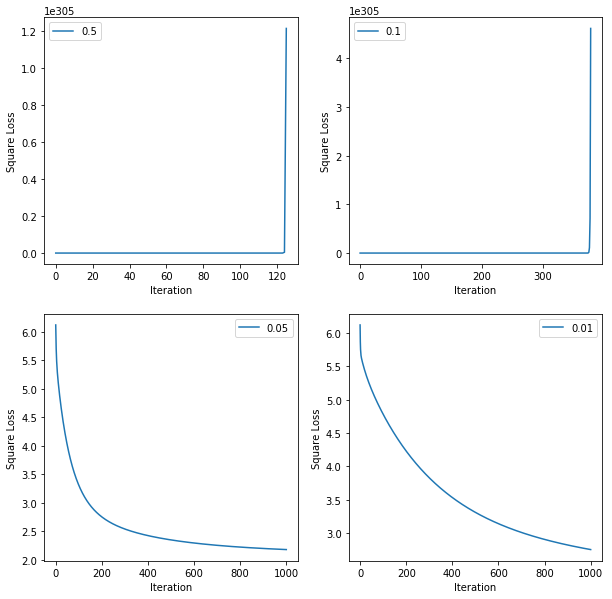

In [8]:
df = pd.read_csv('ridge_regression_dataset.csv', delimiter=',')
X = df.values[:,:-1]
y = df.values[:,-1]

print('Split into Train and Test')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =100, random_state=123)

print("Scaling all to [0, 1]")
X_train, X_test = feature_normalization(X_train, X_test)
X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Add bias term
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))  # Add bias term
# TODO
# linear question 4
step_size = [0.5, 0.1, 0.05, 0.01]

plt.figure(figsize=(10, 10))
for i, s in enumerate(step_size):
    theta_list, loss_list = batch_grad_descent(X_train, y_train, alpha=s, num_step=1000, grad_check=False)
    plt.subplot(2, 2, i+1)
    plt.plot(range(0, 1001), loss_list)
    plt.xlabel("Iteration")
    plt.ylabel("Square Loss")
    plt.legend(labels=[s])
plt.show()

When the epsilon is set to 0.5 and 0.1, the loss function explodes. However, it converges quickly at 0.05. Step size at 0.01 is too slow to make the loss function converge.

## Ridge Regression

### 1.

$J(\theta)=\frac{1}{m}(x\theta-y)^T(x\theta-y)+\lambda \theta^T \theta$

$\nabla J(\theta)=\frac{2}{m}x^T(x\theta-y)+2\lambda\theta$

### 2.

In [9]:
### The gradient of regularized batch gradient descent
def compute_regularized_square_loss_gradient(X, y, theta, lambda_reg):
    """
    Compute the gradient of L2-regularized average square loss function given X, y and theta

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)
        lambda_reg - the regularization coefficient

    Returns:
        grad - gradient vector, 1D numpy array of size (num_features)
    """
    #TODO
    P = (np.dot(X, theta)-y)
    m = X.shape[0]

    return (2/m)*np.dot(X.T, P)+(2*lambda_reg*theta)

### 3.

In [10]:
### Regularized batch gradient descent
def regularized_grad_descent(X, y, alpha=0.05, lambda_reg=10**-2, num_step=1000):
    """
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - step size in gradient descent
        lambda_reg - the regularization coefficient
        num_step - number of steps to run
    
    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size (num_step+1, num_features)
                     for instance, theta in step 0 should be theta_hist[0], theta in step (num_step+1) is theta_hist[-1]
        loss hist - the history of average square loss function without the regularization term, 1D numpy array.
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.zeros(num_features) #Initialize theta
    theta_hist = np.zeros((num_step+1, num_features)) #Initialize theta_hist
    loss_hist = np.zeros(num_step+1) #Initialize loss_hist
    #TODO
    loss_hist[0] = compute_square_loss(X, y, theta)
    for i in range(1, num_step+1):
        g = compute_regularized_square_loss_gradient(X, y, theta, lambda_reg)
        theta = theta - alpha*g

        # update
        avg_loss = compute_square_loss(X, y, theta)
        theta_hist[i] = theta
        loss_hist[i] = avg_loss

    return [theta_hist, loss_hist]

### 4. 

If we use a large number for the extra bias dimension, the weight of the bias term would become much smaller in order to get the same intersection value as the previous one. Therefore, a much smaller weight won't make a significant effect on the regulization

### 5.

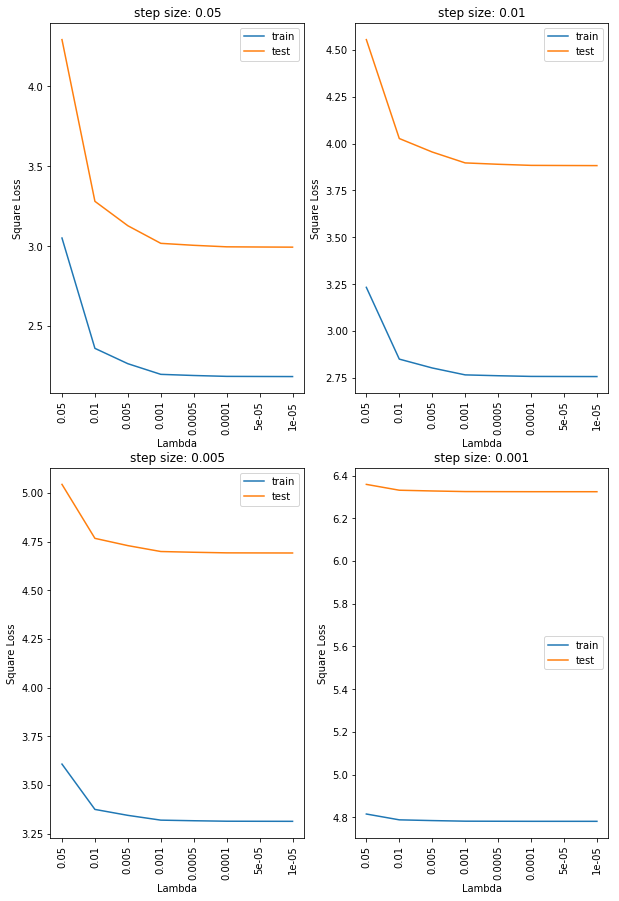

In [11]:
steps = [5*10**-2, 10**-2, 5*10**-3, 10**-3]
lambda_list = [(10**i)*j for i in np.linspace(-2, -5, 4) for j in [5, 1]]
def train_ridge_regression(step_size, lambda_list):
    plt.figure(figsize=(10, 15))
    for i, s in enumerate(step_size):
        loss_train = []
        loss_test = []
        for l in lambda_list:
            theta_list, loss_list = regularized_grad_descent(X_train, y_train, alpha=s, lambda_reg=l, num_step=1000)
            loss_train.append(loss_list[-1])
            loss_test.append(compute_square_loss(X_test, y_test, theta_list[-1]))
    
        plt.subplot(2, 2, i+1)
        xtick = range(1, len(lambda_list)+1)
        plt.plot(xtick, loss_train)
        plt.plot(xtick, loss_test)
        plt.xticks(ticks=xtick, labels=lambda_list, rotation=90)
        plt.title("step size: " + str(s))
        plt.xlabel("Lambda")
        plt.ylabel("Square Loss")
        plt.legend(labels=["train", "test"])
    plt.show()
    
train_ridge_regression(steps, lambda_list)

### 6. 
I decided to choose the step size at 0.01 because not only did it converge quickly but also the square loss of both the training and testing set is better than others and pretty close to each other as well.

## Stochastic Gradient Descent

### 1.

$f_i(\theta)=(h_\theta(x_i)-y_i)^2+\lambda \theta^T\theta$

### 2.

$J(\theta)=\frac{1}{m}\sum_{i=1}^m(x_i\theta-y_i)^2$

$f_i(\theta)=(x_i\theta-y_i)^2$

$\nabla J(\theta)=\frac{\partial J(\theta)}{\partial \theta}=\frac{1}{m}\sum_{i=1}^m 2(x_i\theta-y_i)x_i$

$\nabla f_i(\theta)=\frac{\partial f_i(\theta)}{\partial \theta}=2(x_i\theta-y_i)x_i$

$E(\nabla f_i(\theta))$

$=E(2(x_i\theta-y_i)x_i)=\sum_{i=1}^m \frac{1}{m} \cdot 2(x_i\theta-y_i)x_i$

$=\nabla J(\theta)$, Q.E.D.

### 3.

$g=\nabla f_i(\theta)=\frac{\partial f_i(\theta)}{\partial \theta}=2x_i^T(x_i\theta-y_i)+2\lambda \theta$

$=> \theta^{k+1}=\theta^k - \eta g$

### 4.

In [12]:
### Stochastic gradient descent
def stochastic_grad_descent(X, y, alpha=0.01, lambda_reg=10**-2, num_epoch=1000):
    """
    In this question you will implement stochastic gradient descent with regularization term

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - string or float, step size in gradient descent
                NOTE: In SGD, it's not a good idea to use a fixed step size. Usually it's set to 1/sqrt(t) or 1/t
                if alpha is a float, then the step size in every step is the float.
                if alpha == "1/sqrt(t)", alpha = 1/sqrt(t).
                if alpha == "1/t", alpha = 1/t.
        lambda_reg - the regularization coefficient
        num_epoch - number of epochs to go through the whole training set

    Returns:
        theta_hist - the history of parameter vector, 3D numpy array of size (num_epoch, num_instances, num_features)
                     for instance, theta in epoch 0 should be theta_hist[0], theta in epoch (num_epoch) is theta_hist[-1]
        loss hist - the history of loss function vector, 2D numpy array of size (num_epoch, num_instances)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.ones(num_features) #Initialize theta

    theta_hist = np.zeros((num_epoch, num_instances, num_features)) #Initialize theta_hist
    loss_hist = np.zeros((num_epoch, num_instances)) #Initialize loss_hist
    #TODO
    for i in range(num_epoch):
        shuffled_index = np.arange(X.shape[0])
        np.random.shuffle(shuffled_index)
        for step, j in enumerate(shuffled_index):
            g = compute_regularized_square_loss_gradient(X[j], y[j], theta, lambda_reg)
            theta = theta - (alpha/np.sqrt((i*len(shuffled_index))+(step+1)))*g

            # update
            avg_loss = compute_square_loss(X, y, theta)
            theta_hist[i][j] = theta
            loss_hist[i][j] = avg_loss

    return [theta_hist, loss_hist]

### 5.

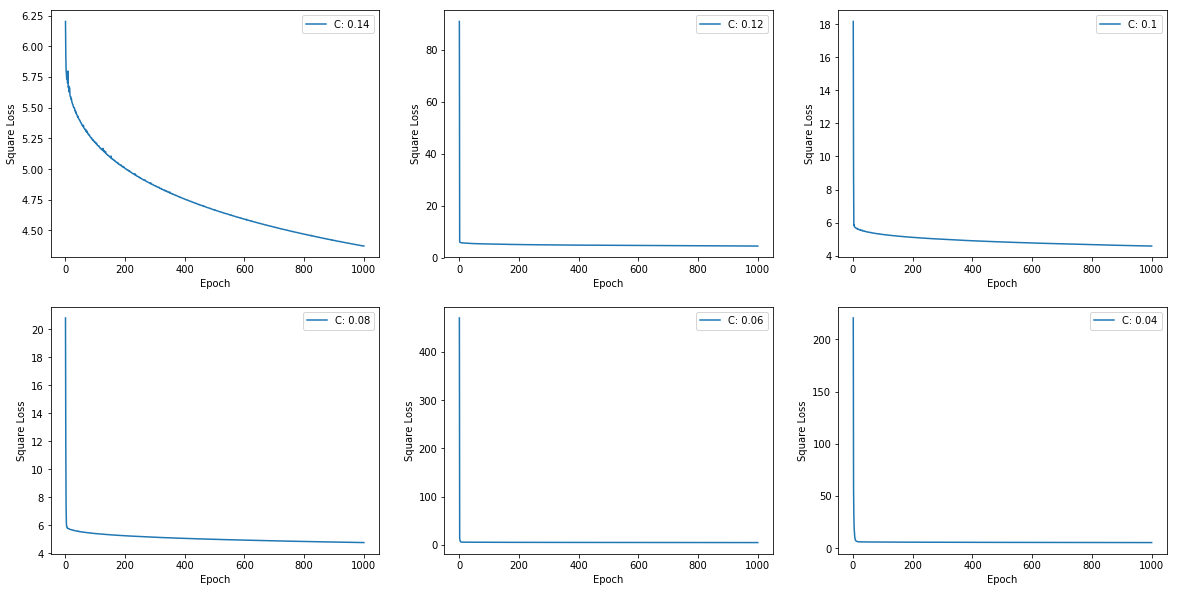

In [13]:
# SGD question 5
C = np.linspace(0.14, 0.04, 6)
lambda_sgd = 10**-3
plt.figure(figsize=(20, 10))
for i, s in enumerate(C):
    theta_list, loss_list = stochastic_grad_descent(X, y, alpha=s, lambda_reg=lambda_sgd, num_epoch=1000)
    plt.subplot(2, 3, i+1)
    plt.plot(range(1, 1001), [epo[-1] for epo in loss_list])
    plt.xlabel("Epoch")
    plt.ylabel("Square Loss")
    plt.legend(labels=["C: "+str(np.round(s, 2))])
plt.show()